# Data Preparation & Pre-processing

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scorecardpy as sc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Load Dataset

In [2]:
prev_app = pd.read_csv('previous_application.csv')

In [3]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prev_app.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Check Missing Value

In [5]:
df = prev_app.copy()

In [6]:
# Check null values
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,RATE_INTEREST_PRIVILEGED,1664263,float64,99.643698
1,RATE_INTEREST_PRIMARY,1664263,float64,99.643698
2,AMT_DOWN_PAYMENT,895844,float64,53.636480
3,RATE_DOWN_PAYMENT,895844,float64,53.636480
4,NAME_TYPE_SUITE,820405,object,49.119754
5,NFLAG_INSURED_ON_APPROVAL,673065,float64,40.298129
6,DAYS_TERMINATION,673065,float64,40.298129
7,DAYS_LAST_DUE,673065,float64,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,673065,float64,40.298129
9,DAYS_FIRST_DUE,673065,float64,40.298129


In [7]:
# Drop feature that have more than 35% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 35].index.tolist()

In [8]:
# Create Function to remove feature that have more than 35% missing value
def col_full_null(df):
    list_drop_col = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE',
                    'NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE',
                    'DAYS_FIRST_DRAWING','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','PRODUCT_COMBINATION','AMT_CREDIT']
    df.drop(columns=list_drop_col, inplace = True)

In [9]:
col_full_null(df)

## EDA

In [10]:
df_eda = df.copy()

In [11]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

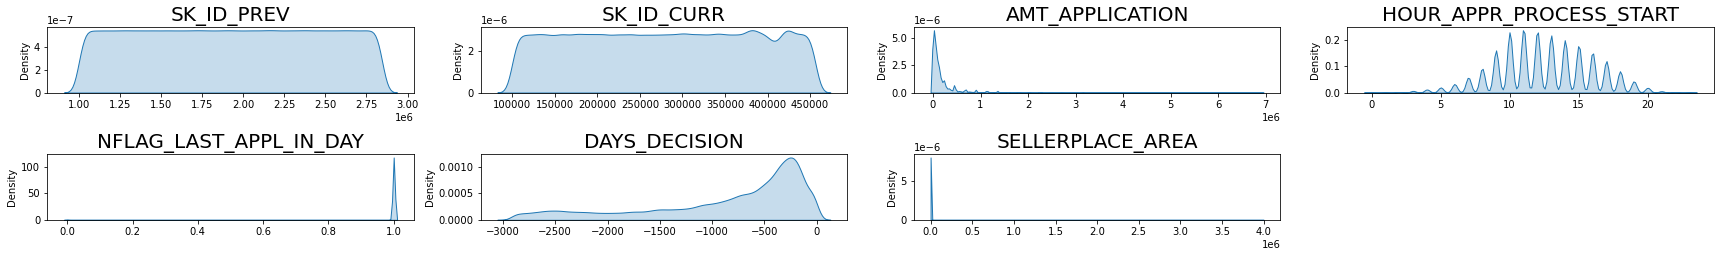

In [12]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(16,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

ValueError: num must be 1 <= num <= 12, not 13

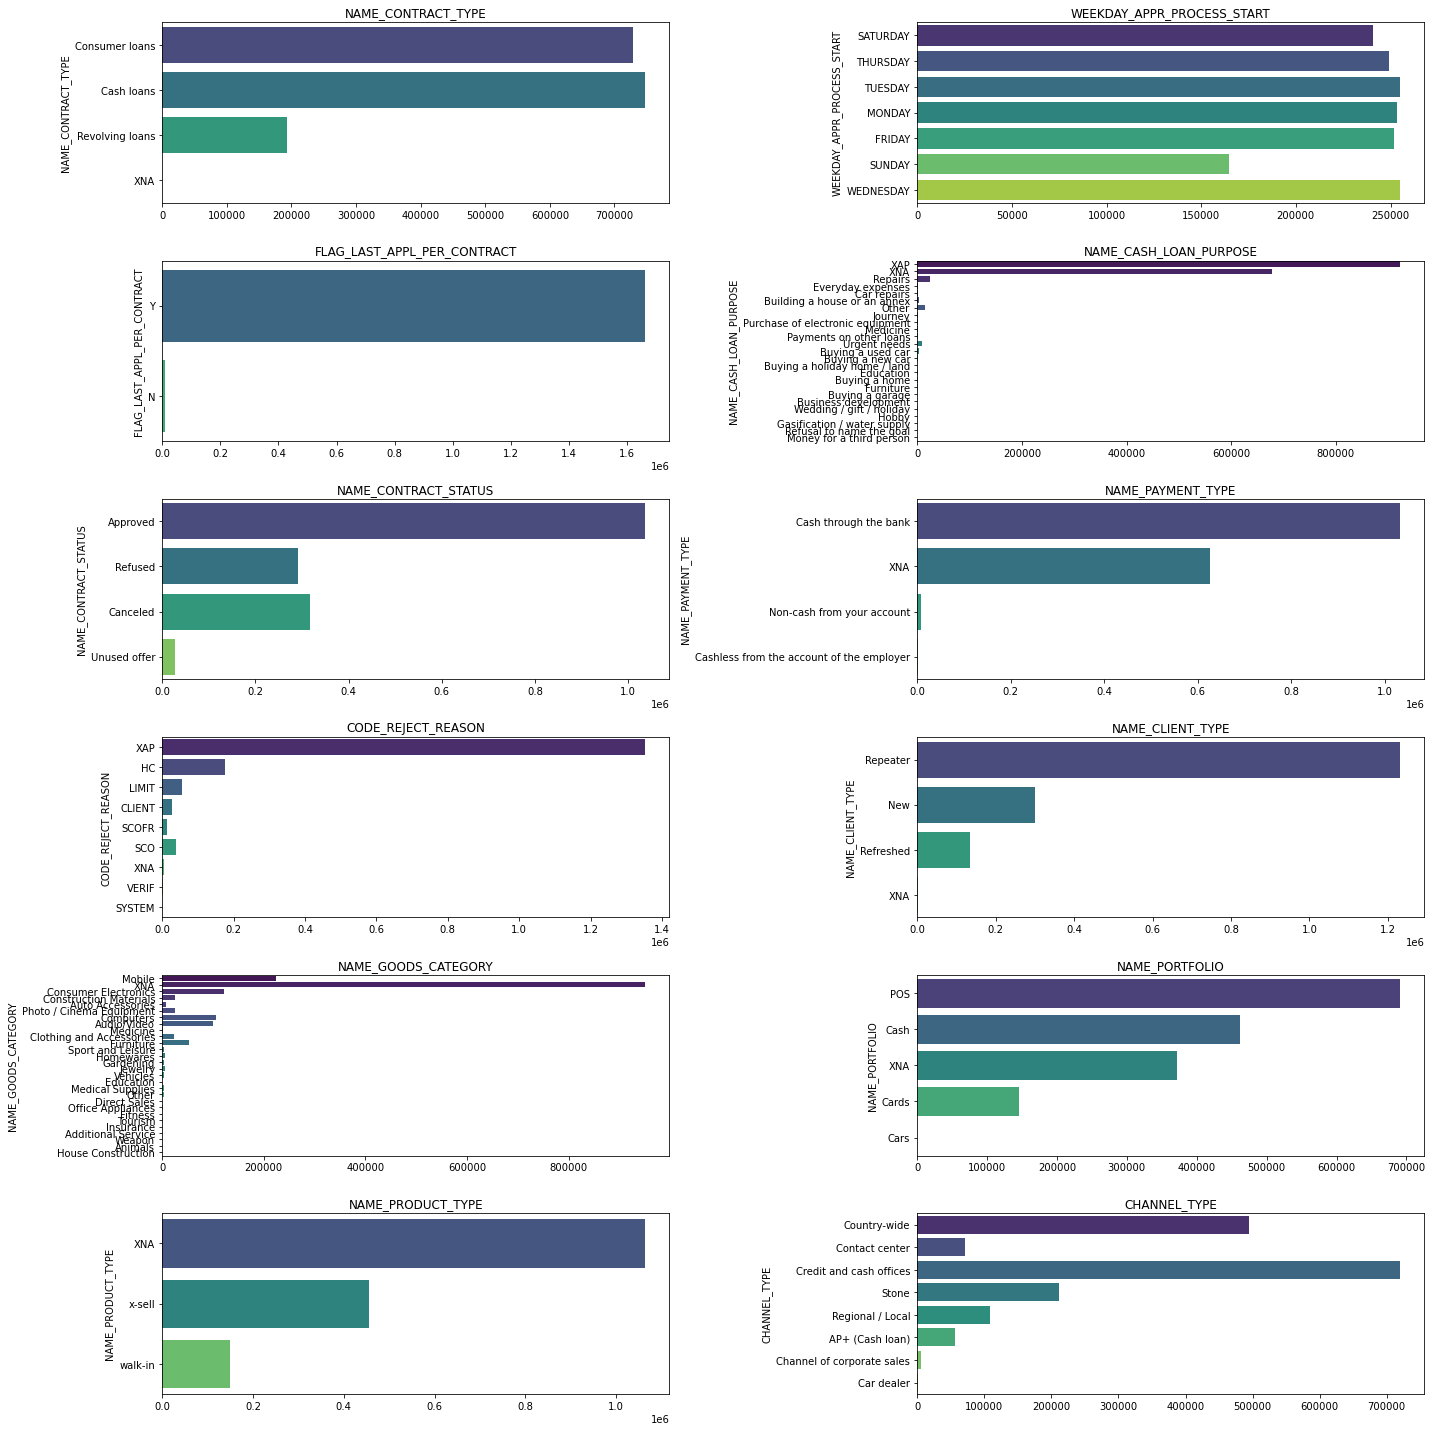

In [13]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

# Preprocessing

In [14]:
df_preprocessing = df_eda.copy()

In [15]:
df_preprocessing.isna().count()

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_APPLICATION                1670214
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE                   1670214
SELLERPLACE_AREA               1670214
NAME_SELLER_INDUSTRY           1670214
NAME_YIELD_GROUP               1670214
dtype: int64

In [16]:
df_preprocessing.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [17]:
df_preprocessing.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.0
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,100001.0,189329.00,278714.5,367514.00,456255.0
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.0,18720.00,71046.0,180360.00,6905160.0
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.0,10.00,12.0,15.00,23.0
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.0,1.00,1.0,1.00,1.0
DAYS_DECISION,1670214.0,-8.806797e+02,779.099667,-2922.0,-1300.00,-581.0,-280.00,-1.0
SELLERPLACE_AREA,1670214.0,3.139511e+02,7127.443459,-1.0,-1.00,3.0,82.00,4000000.0


## Mencari & Menghapus Outlier AMT_APPLICATION & DAYS_DECISION

In [18]:
#Mencari&Menghapus outlier AMT_APPLICATION
print('---AMT_APPLICATION---')
Q1, Q3 = np.percentile(df_preprocessing['AMT_APPLICATION'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
print(Q1)
print(Q3)
print(IQR)
print(low)
print(high)
df_preprocessing[(df_preprocessing['AMT_APPLICATION'] <= low) | (df_preprocessing['AMT_APPLICATION'] >= high)].count()
df_preprocessing = df_preprocessing[(df_preprocessing['AMT_APPLICATION'] >= low) & (df_preprocessing['AMT_APPLICATION'] <= high)]

---AMT_APPLICATION---
18720.0
180360.0
161640.0
-223740.0
422820.0


In [19]:
#Mencari&Menghapus outlier DAYS_DECISION
print('---DAYS_DECISION---')
Q1, Q3 = np.percentile(df_preprocessing['DAYS_DECISION'],[25,75])
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
high = Q3 + (1.5 * IQR)
print(Q1)
print(Q3)
print(IQR)
print(low)
print(high)
df_preprocessing[(df_preprocessing['DAYS_DECISION'] <= low) | (df_preprocessing['DAYS_DECISION'] >= high)].count()
df_preprocessing = df_preprocessing[(df_preprocessing['DAYS_DECISION'] >= low) & (df_preprocessing['DAYS_DECISION'] <= high)]

---DAYS_DECISION---
-1445.0
-284.0
1161.0
-3186.5
1457.5


In [20]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462195 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1462195 non-null  int64  
 1   SK_ID_CURR                   1462195 non-null  int64  
 2   NAME_CONTRACT_TYPE           1462195 non-null  object 
 3   AMT_APPLICATION              1462195 non-null  float64
 4   WEEKDAY_APPR_PROCESS_START   1462195 non-null  object 
 5   HOUR_APPR_PROCESS_START      1462195 non-null  int64  
 6   FLAG_LAST_APPL_PER_CONTRACT  1462195 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY       1462195 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE       1462195 non-null  object 
 9   NAME_CONTRACT_STATUS         1462195 non-null  object 
 10  DAYS_DECISION                1462195 non-null  int64  
 11  NAME_PAYMENT_TYPE            1462195 non-null  object 
 12  CODE_REJECT_REASON           1462195 non-n

## After Processing

In [21]:
num = df_preprocessing.select_dtypes(include='number').columns
cat = df_preprocessing.select_dtypes(include='object').columns

In [22]:
print(len(num))
print(len(cat))

7
14


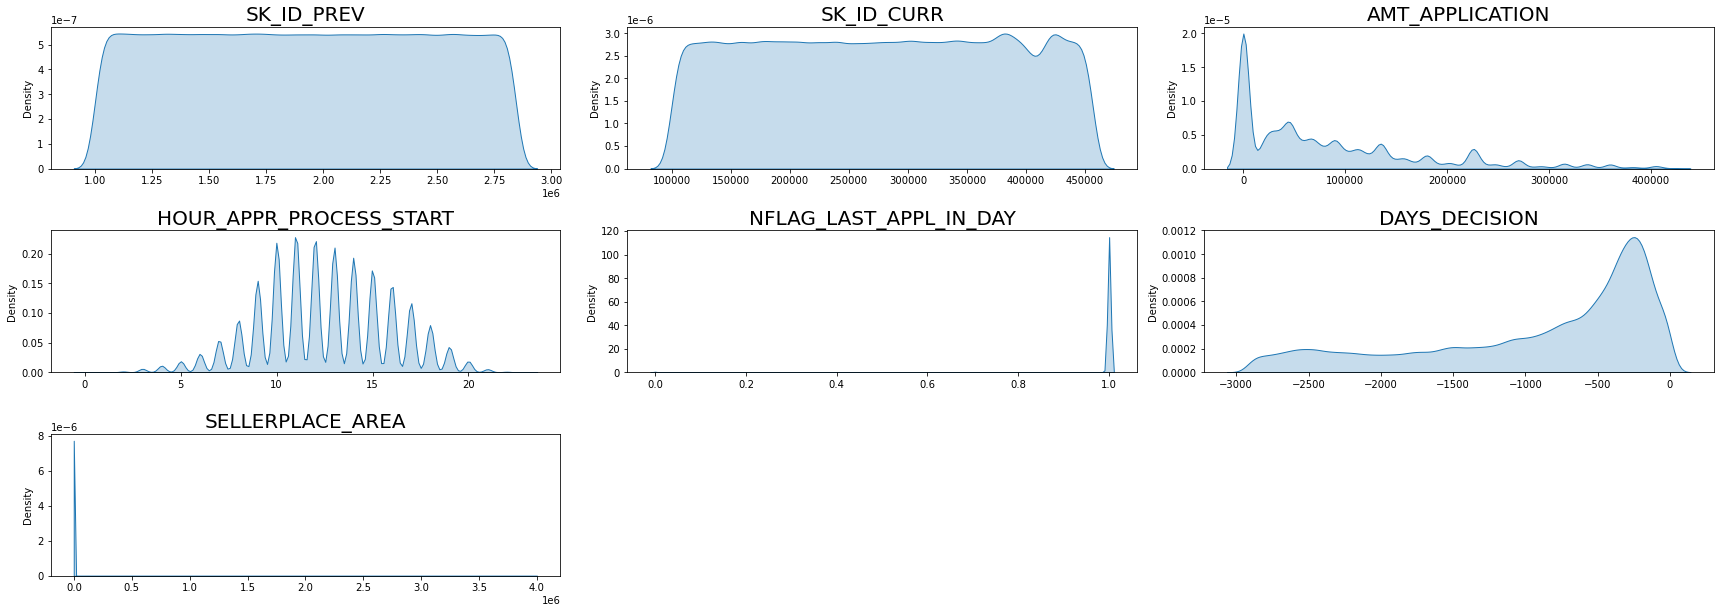

In [23]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,3,i+1)
    sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

ValueError: num must be 1 <= num <= 6, not 7

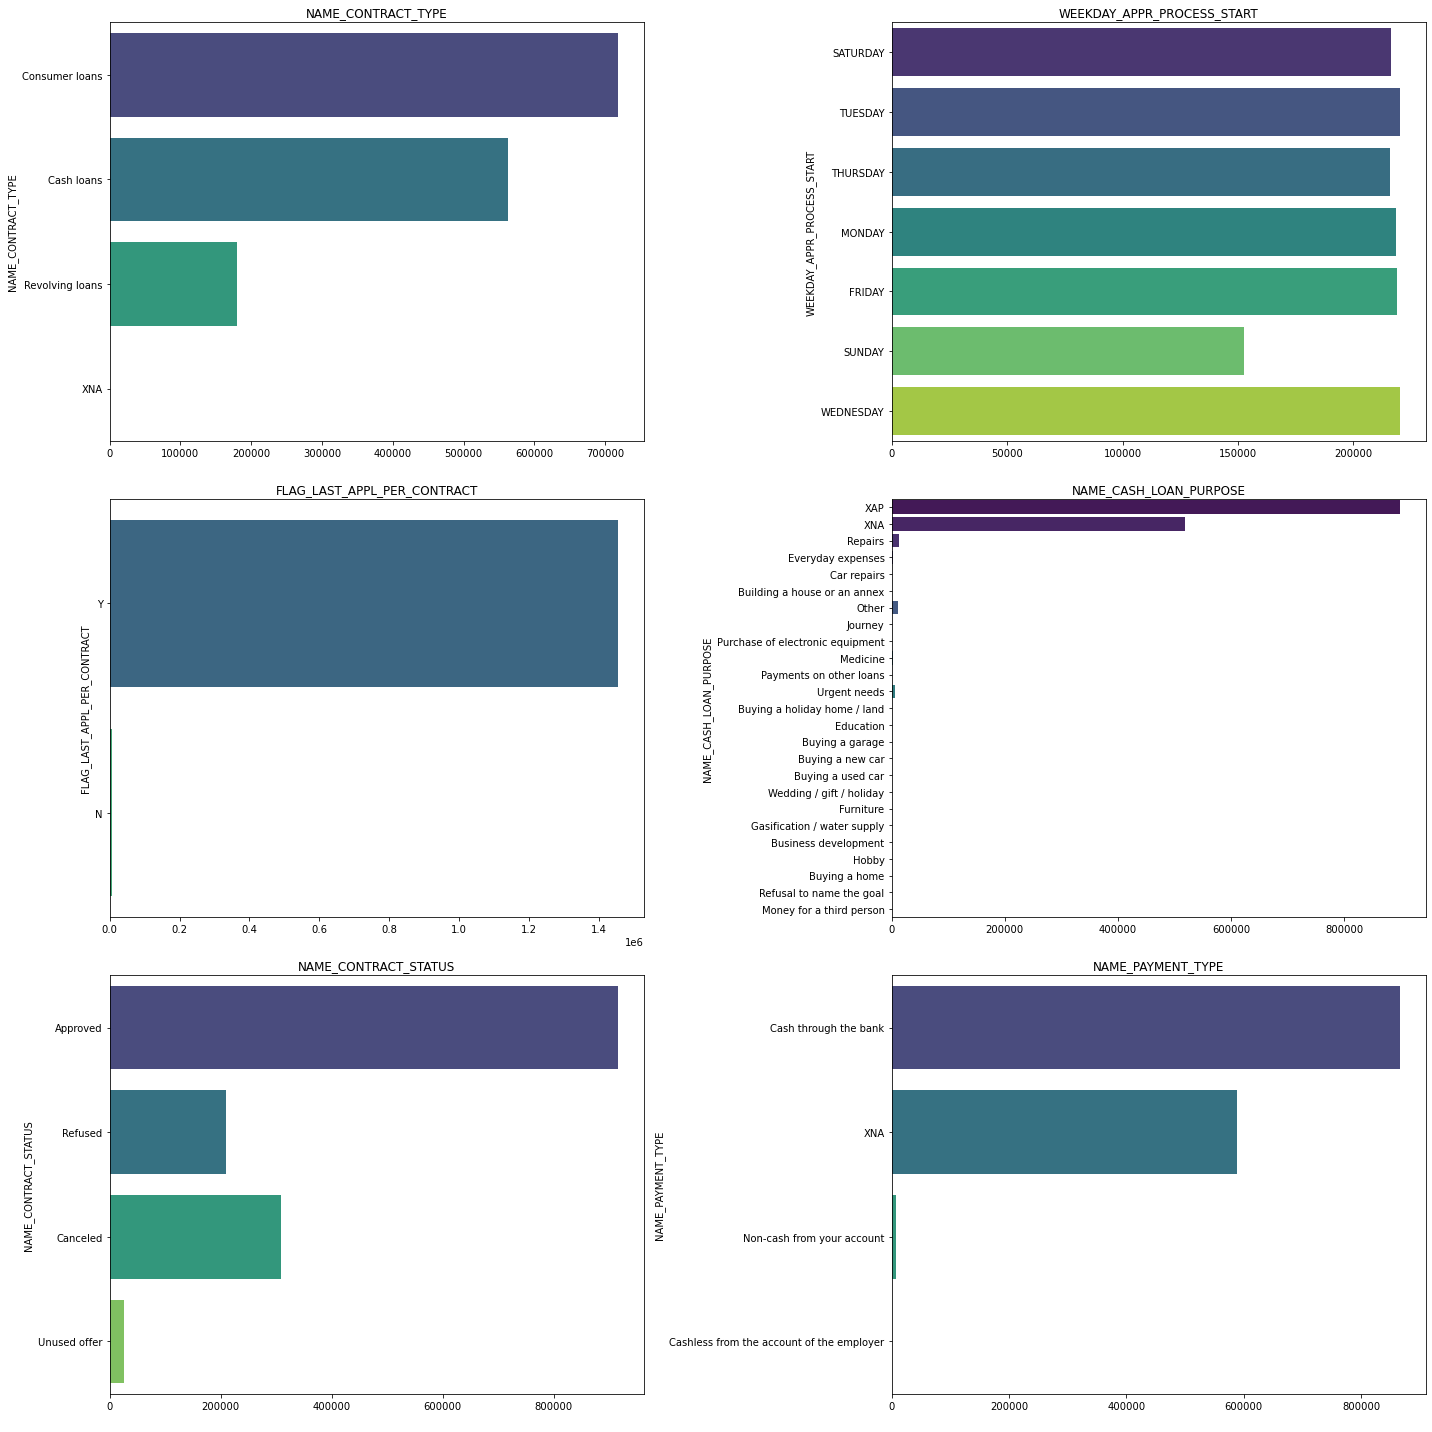

In [24]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Insight

In [32]:
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462195 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1462195 non-null  int64  
 1   SK_ID_CURR                   1462195 non-null  int64  
 2   NAME_CONTRACT_TYPE           1462195 non-null  object 
 3   AMT_APPLICATION              1462195 non-null  float64
 4   WEEKDAY_APPR_PROCESS_START   1462195 non-null  object 
 5   HOUR_APPR_PROCESS_START      1462195 non-null  int64  
 6   FLAG_LAST_APPL_PER_CONTRACT  1462195 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY       1462195 non-null  int64  
 8   NAME_CASH_LOAN_PURPOSE       1462195 non-null  object 
 9   NAME_CONTRACT_STATUS         1462195 non-null  object 
 10  DAYS_DECISION                1462195 non-null  int64  
 11  NAME_PAYMENT_TYPE            1462195 non-null  object 
 12  CODE_REJECT_REASON           1462195 non-n

In [31]:
df_preprocessing.groupby('NAME_CONTRACT_STATUS')['SK_ID_CURR'].count()

NAME_CONTRACT_STATUS
Approved        916337
Canceled        309162
Refused         210356
Unused offer     26340
Name: SK_ID_CURR, dtype: int64

Dari 1462195 data, 62.6% memiliki status approved, 21.1% canceled, 14.3% refused, dan 1,8% unused. Tingkat penerimaan kredit terbilang besar namun tidak dapat dipungkiri kredit yang ditolak juga memiliki percentase yang besar. Apakah kriteria name seller industry, name client type, name payment type,  name yield group, dan name contract type sebagai hal paling umum dalam persyaratan kredit secara bersama-sama mempengaruhi approved tidaknya pengajuan? Oleh karena itu dilakukan analisa bagaimana tingkat approve dari tiap faktor dan apakah metode yang digunakan (Regresi Linier Sederhana) mampu memberikan hasil akurasi yang baik berdasarkan 5 faktor tersebut?

In [25]:
df_preprocessing.groupby(['NAME_SELLER_INDUSTRY','NAME_CONTRACT_STATUS']).agg({
    'SK_ID_CURR':'count'})

SK_ID_CURR
NAME_SELLER_INDUSTRY NAME_CONTRACT_STATUS            
Auto technology      Approved                    4349
                     Canceled                       1
                     Refused                      345
                     Unused offer                   3
Clothing             Approved                   19784
                     Canceled                       1
                     Refused                     1789
                     Unused offer                  52
Connectivity         Approved                  215202
                     Canceled                    1605
                     Refused                    35147
                     Unused offer               22187
Construction         Approved                   25347
                     Canceled                      11
                     Refused                     2442
                     Unused offer                  66
Consumer electronics Approved                  341337
                     Canceled                     242
                     Refused                    47327
                     Unused offer                3276
Furniture            Approved                   49326
                     Canceled                     172
                     Refused                     4698
                     Unused offer                 197
Industry             Approved                   16305
                     Canceled                       4
                     Refused                     1599
                     Unused offer                  51
Jewelry              Approved                    2454
                     Canceled                       1
                     Refused                      228
MLM partners         Approved                     722
                     Canceled                     208
                     Refused                      130
                     Unused offer                   1
Tourism              Approved                     375
                     Refused                       25
XNA                  Approved                  241136
                     Canceled                  306917
                     Refused                   116626
                     Unused offer                 507

In [26]:
df_preprocessing.groupby(['NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS']).agg({
    'SK_ID_CURR':'count'})

SK_ID_CURR
NAME_CLIENT_TYPE NAME_CONTRACT_STATUS            
New              Approved                  273696
                 Canceled                    3457
                 Refused                    13379
                 Unused offer                2116
Refreshed        Approved                   86321
                 Canceled                   18936
                 Refused                    11238
                 Unused offer                3940
Repeater         Approved                  555826
                 Canceled                  285809
                 Refused                   185525
                 Unused offer               20251
XNA              Approved                     494
                 Canceled                     960
                 Refused                      214
                 Unused offer                  33

In [27]:
df_preprocessing.groupby(['NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS']).agg({
    'SK_ID_CURR':'count'})

SK_ID_CURR
NAME_PAYMENT_TYPE                         NAME_CONTRACT_STATUS            
Cash through the bank                     Approved                  716266
                                          Canceled                    1198
                                          Refused                   122918
                                          Unused offer               25790
Cashless from the account of the employer Approved                     786
                                          Canceled                       7
                                          Refused                      125
                                          Unused offer                   8
Non-cash from your account                Approved                    6589
                                          Canceled                       9
                                          Refused                      880
                                          Unused offer                  33
XNA                                       Approved                  192696
                                          Canceled                  307948
                                          Refused                    86433
                                          Unused offer                 509

In [28]:
df_preprocessing.groupby(['NAME_YIELD_GROUP','NAME_CONTRACT_STATUS']).agg({
    'SK_ID_CURR':'count'})

SK_ID_CURR
NAME_YIELD_GROUP NAME_CONTRACT_STATUS            
XNA              Approved                   90368
                 Canceled                  306167
                 Refused                    82279
                 Unused offer               25430
high             Approved                  290829
                 Canceled                     650
                 Refused                    50291
                 Unused offer                  72
low_action       Approved                   61800
                 Canceled                     108
                 Refused                     8679
low_normal       Approved                  192852
                 Canceled                     825
                 Refused                    28246
                 Unused offer                 653
middle           Approved                  280488
                 Canceled                    1412
                 Refused                    40861
                 Unused offer                 185

In [29]:
df_preprocessing.groupby(['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']).agg({
    'SK_ID_CURR':'count'})

SK_ID_CURR
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS            
Cash loans         Approved                  207301
                   Canceled                  261547
                   Refused                    93608
                   Unused offer                 493
Consumer loans     Approved                  618671
                   Canceled                    1510
                   Refused                    72370
                   Unused offer               25842
Revolving loans    Approved                   90365
                   Canceled                   45790
                   Refused                    44347
                   Unused offer                   5
XNA                Canceled                     315
                   Refused                       31

## Feature Encoding

In [33]:
df_preprocessing["NAME_YIELD_GROUP"].value_counts()

XNA           504244
high          341842
middle        322946
low_normal    222576
low_action     70587
Name: NAME_YIELD_GROUP, dtype: int64

In [34]:
df_preprocessing["NAME_SELLER_INDUSTRY"].value_counts()

XNA                     665186
Consumer electronics    392182
Connectivity            274141
Furniture                54393
Construction             27866
Clothing                 21626
Industry                 17959
Auto technology           4698
Jewelry                   2683
MLM partners              1061
Tourism                    400
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [35]:
df_preprocessing["NAME_CONTRACT_TYPE"].value_counts()

Consumer loans     718393
Cash loans         562949
Revolving loans    180507
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [36]:
df_preprocessing["NAME_CONTRACT_STATUS"].value_counts()

Approved        916337
Canceled        309162
Refused         210356
Unused offer     26340
Name: NAME_CONTRACT_STATUS, dtype: int64

In [37]:
df_preprocessing["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        866172
XNA                                          587586
Non-cash from your account                     7511
Cashless from the account of the employer       926
Name: NAME_PAYMENT_TYPE, dtype: int64

In [38]:
df_preprocessing["NAME_CLIENT_TYPE"].value_counts()

Repeater     1047411
New           292648
Refreshed     120435
XNA             1701
Name: NAME_CLIENT_TYPE, dtype: int64

In [39]:
f_encode = {"NAME_SELLER_INDUSTRY": {"XNA": 1, "Consumer electronics": 2, "Connectivity":3,"Furniture":4,"Construction":5,"Clothing":6,"Industry":7,"Auto technology":8,"Jewelry":9,"MLM partners":10,"Tourism":11},
                "NAME_CLIENT_TYPE": {"Repeater": 1, "New": 2, "Refreshed":3,"XNA":4},
                "NAME_CONTRACT_TYPE": {"Consumer loans":1, "Cash loans":2, "Revolving loans":3,"XNA":4},
                "NAME_YIELD_GROUP": {"XNA":1, "high":2, "middle":3,"low_normal":4,"low_action":5},
                "NAME_PAYMENT_TYPE": {"XNA":1, "Cash through the bank":2, "Non-cash from your account":3, "Cashless from the account of the employer":4},
                "NAME_CONTRACT_STATUS": {"Approved":1, "Canceled":2, "Refused":3, "Unused offer":4}
            }

In [40]:
df_preprocessing = df_preprocessing.replace(f_encode)
df_preprocessing.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,1,17145.0,SATURDAY,15,Y,1,XAP,1,-73,2,XAP,1,Mobile,POS,XNA,Country-wide,35,3,3
2,2523466,122040,2,112500.0,TUESDAY,11,Y,1,XNA,1,-301,2,XAP,1,XNA,Cash,x-sell,Credit and cash offices,-1,1,2
4,1784265,202054,2,337500.0,THURSDAY,9,Y,1,Repairs,3,-781,2,HC,1,XNA,Cash,walk-in,Credit and cash offices,-1,1,2
5,1383531,199383,2,315000.0,SATURDAY,8,Y,1,Everyday expenses,1,-684,2,XAP,1,XNA,Cash,x-sell,Credit and cash offices,-1,1,4
6,2315218,175704,2,0.0,TUESDAY,11,Y,1,XNA,2,-14,1,XAP,1,XNA,XNA,XNA,Credit and cash offices,-1,1,1


In [41]:
dt_s = df_preprocessing.copy()

In [42]:
x = dt_s[['NAME_SELLER_INDUSTRY','NAME_CLIENT_TYPE','NAME_PAYMENT_TYPE','NAME_YIELD_GROUP','NAME_CONTRACT_TYPE']]
y = dt_s['NAME_CONTRACT_STATUS']

In [43]:
# Membagi data menjadi the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [44]:
# Fitting Simple Linear Regression terhadap Training set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [45]:
print(lin_reg.coef_)

[-0.04964198 -0.15914884 -0.07104356 -0.21509784 -0.04575726]


In [46]:
print(lin_reg.intercept_)

2.560398975343497


In [47]:
lin_reg.score(x_test, y_test)

0.1718563846803628